# LabAst577 - Observational Astronomy
# Notebook with some basic data reduction and analysis with python

## First, import necessary libraries

In [19]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from astropy.io import fits
import requests,io
import os


## Let's open fits files

In [45]:
urldir = os.listdir('wednesday/20230920/')
#req1,req2 = requests.get(urldir+'bias_good_2023-09-20_18-45-48_0000.fits',verify=False),requests.get(urldir+'bias_good_2023-09-20_18-45-50_0001',verify=False) #file name 
# fits1,fits2 = fits.open(io.BytesIO(req1.content)),fits.open(io.BytesIO(req2.content))

fits1,fits2 = fits.open(name='wednesday/20230920/'+'Deneb_2023-09-20_21-11-46_black_0215.fits'),fits.open(name='wednesday/20230920/'+'bias_good_2023-09-20_18-45-50_0001.fits')
head1,head2 = fits1[0].header,fits2[0].header
flat1,flat2 = fits1[0].data,fits2[0].data

## Plot fits files

Text(0, 0.5, 'ypix')

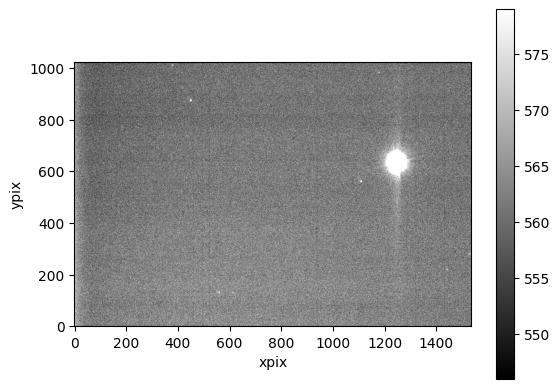

In [46]:
#one plot
lo,up = np.percentile(flat1,1),np.percentile(flat1,99)
plt.figure()
plt.imshow(flat1,cmap='gray',origin='lower',clim=(lo,up))
plt.colorbar()
plt.xlabel('xpix')
plt.ylabel('ypix')

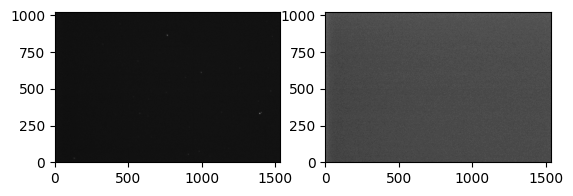

In [43]:
#two plots
fig,ax = plt.subplots(1,2)
ax[0].imshow(flat1/np.median(flat1),cmap='gray',origin='lower')
ax[1].imshow(flat2/np.median(flat2),cmap='gray',origin='lower')

## Stack two images

In [ ]:
allflat = np.asarray([flat1/np.median(flat1),flat2/np.median(flat2)])
np.shape(allflat)

(2, 1024, 1536)

In [ ]:
allflat = np.asarray([flat1/np.median(flat1),flat2/np.median(flat2)])
medianflat,meanflat = np.median(allflat,axis=0),np.mean(allflat,axis=0)

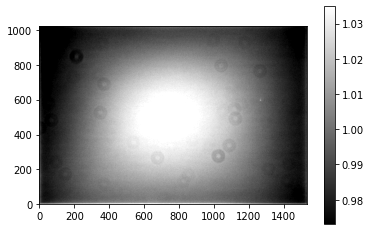

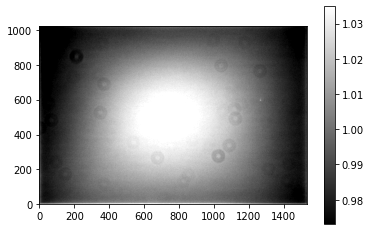

In [ ]:
#plot them
lo,up = np.percentile(medianflat,5),np.percentile(medianflat,95)
plt.figure()
plt.imshow(medianflat,cmap='gray',clim=(lo,up),origin='lower')
plt.colorbar()
lo,up = np.percentile(meanflat,5),np.percentile(meanflat,95)
plt.figure()
plt.imshow(meanflat,cmap='gray',clim=(lo,up),origin='lower')
plt.colorbar()

## Shift image to align with another

In [ ]:
#First load two other images:
req1,req2 = requests.get(urldir+'Usagittae_2021-10-12_20-32-57_Red_0370.fits',verify=False),requests.get(urldir+'Usagittae_2021-10-12_20-31-11_Red_0358.fits',verify=False) #file names
fits1,fits2 = fits.open(io.BytesIO(req1.content)),fits.open(io.BytesIO(req2.content))
head1,head2 = fits1[0].header,fits2[0].header
data1,data2 = fits1[0].data,fits2[0].data

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


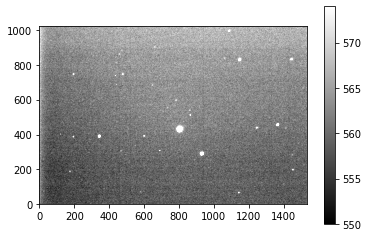

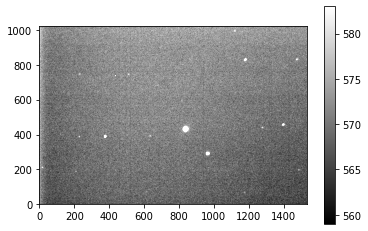

In [ ]:
## Plot these two images
lo,up = np.percentile(data1,5),np.percentile(data1,95)
plt.figure()
plt.imshow(data1,cmap='gray',clim=(lo,up),origin='lower')
plt.colorbar()
lo,up = np.percentile(data2,5),np.percentile(data2,95)
plt.figure()
plt.imshow(data2,cmap='gray',clim=(lo,up),origin='lower')
plt.colorbar()

In [ ]:
##Obtain positions interactively
%matplotlib notebook
## --- These are auxiliary functions
def onclick1(event):
    if event.button != 1:
        print("     Stopping mouse interaction, close window")
        global fig1,cid1
        fig1.canvas.mpl_disconnect(cid1)
    else:
        global stars1
        print('     star1=%i: x=%d, y=%d, xdata=%f, ydata=%f'%(
            len(stars1)+1, event.x, event.y, event.xdata, event.ydata))
        stars1.append((np.round(event.xdata), np.round(event.ydata)))
    return stars1

def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    text.set_text(tx)

global stars1,fig1,cid1
stars1 = []
fig1 = plt.figure(1,figsize=(10,10))
ax1 = fig1.add_subplot(111)
lo,up = np.percentile(data1, 1),np.percentile(data1, 99)
ax1.imshow(data1,clim=(lo,up))
cid1 = fig1.canvas.mpl_connect('button_press_event', onclick1)
plt.show()
#plt.close(1)

<IPython.core.display.Javascript object>

In [ ]:
## Obtain rough position with the mouse
pos1 = [805,429]
pos2 = [841,430]

In [ ]:
!pip install photutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 826 kB 32.5 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `photutils.centroid_com` is a deprecated alias for `photutils.centroids.centroid_com`. Instead, please use `from photutils.centroids import centroid_com` to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `photutils.centroid_2dg` is a deprecated alias for `photutils.centroids.centroid_2dg`. Instead, please use `from photutils.centroids import centroid_2dg` to silence this warning.
  


[805.07467317 427.94211353] [838.69106092 427.73214521]
[804.75441426 428.43609322] [840.24441508 429.2345646 ]


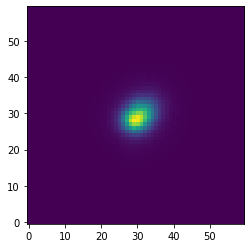

In [ ]:
## Get centroid
from photutils import centroid_com, centroid_2dg  #load centroid libraries
subdata1 = data1[pos1[1]-30:pos1[1]+30,pos1[0]-30:pos1[0]+30]#select subportion of 60x60 image
subdata2 = data2[pos2[1]-30:pos2[1]+30,pos2[0]-30:pos2[0]+30]#select subportion of 60x60 image
plt.imshow(subdata1,origin='lower')
center1,center2 = centroid_2dg(subdata1)+pos1-[30,30],centroid_2dg(subdata2)+pos2-[30,30]
ccenter1,ccenter2 = centroid_com(subdata1)+pos1-[30,30],centroid_com(subdata2)+pos2-[30,30]
print(center1,center2)
print(ccenter1,ccenter2)

In [ ]:
## Shift image
shiftdat = np.roll(data2,-np.int(np.round(center2[1]-center1[1])),axis=0) #shift in y
shiftdata2 = np.roll(shiftdat,-np.int(np.round(center2[0]-center1[0])),axis=1) #shift in x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

In [ ]:
## Save image (in the Google drive)
head2['PROCESS'] = 'shifted'
fits.writeto('Usagittae_2021-10-12_20-31-11_Red_0358_shifted.fits',shiftdata2,head2,overwrite=True)

## Get FWHM by fitting 2d Gaussian to stars


In [ ]:
## load a raw image (I couldn't load your stacked image)
urldir = "https://baltasar.tecnico.ulisboa.pt/~sgonzalez/LabAst_2022/2022-09-26/"
req = requests.get(urldir+'M16_2022-09-26_21-00-44_Green_0207.fits',verify=False)
fitsfile = fits.open(io.BytesIO(req.content))
head1,data1 = fitsfile[0].header,fitsfile[0].data

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [ ]:
## Find stars in the field
from photutils import DAOStarFinder
from astropy.stats import sigma_clipped_stats,gaussian_sigma_to_fwhm

## Get background
mean, median, std = sigma_clipped_stats(data1,sigma=3.0,maxiters=5)
## Find stars
daofind = DAOStarFinder(fwhm=10.0, threshold=4.0*std)  ##peakmax to exclude saturated stars!!
sources = daofind(data1 - median)
print("     Found %i stars in image " %len(sources))

     Found 86 stars in image 


Text(0, 0.5, 'y (pix)')

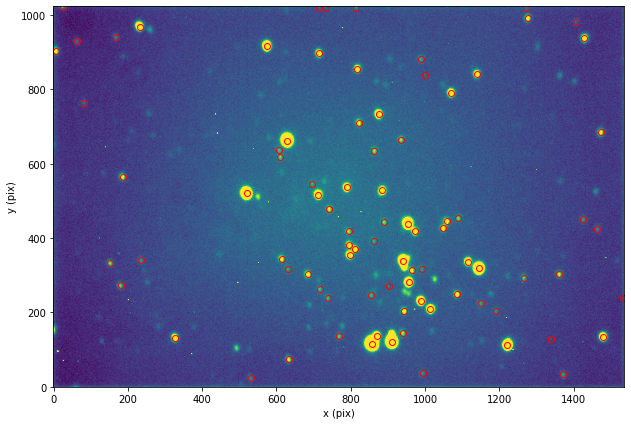

In [ ]:
## Plot stars found
fig = plt.figure(figsize=(12,7))
l1 = np.percentile(data1[np.isfinite(data1)].flatten(), 1)
l2 = np.percentile(data1[np.isfinite(data1)].flatten(), 99)
plt.imshow(data1,clim=(l1,l2),origin='lower')
plt.plot(sources["xcentroid"],sources["ycentroid"],'or',mfc='none')
plt.xlabel("x (pix)")
plt.ylabel("y (pix)")

In [ ]:
## Take nbright brightest stars and print list
nbright = 5
brightest = np.argsort(sources['flux'])[::-1][0:nbright]
brsources = sources[brightest]
print(brsources)

 id     xcentroid      ...        flux               mag        
--- ------------------ ... ------------------ ------------------
  6  856.3994307466936 ...  286.7067703844828 -6.143594871587556
  7   910.461321616597 ...   170.990294551924 -5.582428651094941
 62  628.8247270105402 ... 122.53869263974862 -5.220683106376899
 54   519.408815038219 ...  88.11274810632129 -4.862596866140979
 33 1144.6354650192077 ...   80.6323206552828 -4.766272898204829


In [ ]:
## Fit the Gaussian PSF to brightest stars
rmax = 25
(ny,nx) = np.shape(data1)
from astropy.modeling import models,fitting
fit_g = fitting.LevMarLSQFitter()
allxfwhm, allyfwhm = np.zeros(len(brsources)),np.zeros(len(brsources))
allfwhm,alltheta = np.zeros(len(brsources)),np.zeros(len(brsources))
for i,src in enumerate(brsources):
  if int(src['ycentroid']) > rmax and int(src['ycentroid']) < ny-rmax and \
     int(src['xcentroid']) > rmax and int(src['xcentroid']) < nx-rmax:
    img = data1[int(src['ycentroid'])-rmax:int(src['ycentroid'])+rmax,
                int(src['xcentroid'])-rmax:int(src['xcentroid'])+rmax]
    subx,suby = np.indices(img.shape) # instead of meshgrid
    p_init = models.Gaussian2D(amplitude=np.max(img),x_mean=rmax,y_mean=rmax,x_stddev=1.0,y_stddev=1.0)
    fitgauss = fit_g(p_init, subx, suby, img - np.min(img))
    allxfwhm[i] = np.abs(fitgauss.x_stddev.value)
    allyfwhm[i] = np.abs(fitgauss.y_stddev.value)
    allfwhm[i] = 0.5*(allxfwhm[i]+allyfwhm[i])
    alltheta[i] = fitgauss.theta.value
xfwhm,yfwhm = np.median(allxfwhm)*gaussian_sigma_to_fwhm,np.median(allyfwhm)*gaussian_sigma_to_fwhm
fwhm = np.median(allfwhm)*gaussian_sigma_to_fwhm
sigfwhm, sigxfwhm, sigyfwhm = np.std(allfwhm), np.std(allxfwhm), np.std(allyfwhm)
medtheta = np.median(alltheta)
print("     x-FWHM %f +/- %f (pix) for this image " %(xfwhm,sigxfwhm))
print("     y-FWHM %f +/- %f (pix) for this image " %(yfwhm,sigyfwhm))
print("     FWHM %f +/- %f (pix) for this image " %(fwhm,sigfwhm))

     x-FWHM 12.310639 +/- 0.766872 (pix) for this image 
     y-FWHM 14.973072 +/- 0.563632 (pix) for this image 
     FWHM 14.016953 +/- 0.133410 (pix) for this image 


In [ ]:
## Generate PSF from FWHM
from photutils.psf import prepare_psf_model,extract_stars,EPSFBuilder,IntegratedGaussianPRF
psf = IntegratedGaussianPRF(sigma=fwhm/gaussian_sigma_to_fwhm)  ## 1D Gauss
two2dgauss = models.Gaussian2D(x_mean=0.0,y_mean=0.0,theta=medtheta,x_stddev=xfwhm/gaussian_sigma_to_fwhm,y_stddev=medy/gaussian_sigma_to_fwhm)
two2dpsf = prepare_psf_model(twodgauss,xname='x_mean',yname='y_mean',fluxname='amplitude')
## plot
xx,yy =  np.meshgrid(np.arange(rmax+1)-rmax/2,np.arange(rmax+1)-rmax/2)
impsf = psf.evaluate(xx,yy,*psf.parameters)
fig,ax = plt.subplots(1,1,figsize=(9,5))
ax.imshow(impsf,origin='lower')
ax.set_title('PSF GAUSS MODEL')
impsf = two2dpsf.evaluate(xx,yy,*psf.parameters)
fig,ax = plt.subplots(1,1,figsize=(9,5))
ax.imshow(impsf,origin='lower')
ax.set_title('PSF 2D GAUSS MODEL')

NameError: ignored

## Get background and background noise

In [ ]:
#Load an image
req = requests.get(urldir+'Unukulhai_2021-10-12_18-37-48_black_0074.fits',verify=False)
image = fits.open(io.BytesIO(req.content))[0].data

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [ ]:
from photutils import Background2D,MedianBackground
from astropy.stats import SigmaClip
sigma_clip = SigmaClip(sigma=3.0)
bkg_estimator = MedianBackground()
bkg = Background2D(image,(50,50),filter_size=(3,3),sigma_clip=sigma_clip,
                   bkg_estimator=bkg_estimator)
#print("      Median background found: %f, median bkg noise: %f"%(bkg.background_median,bkg.background_rms_median) )
print(bkg.background)
#print(bkg.background_rms)

[[678.7381364  678.73744202 678.73605326 ... 680.26073706 680.26016073
  680.25962043]
 [678.73798264 678.73728853 678.73590032 ... 680.26092851 680.26035192
  680.25981137]
 [678.73767511 678.73698155 678.73559444 ... 680.2613114  680.2607343
  680.26019327]
 ...
 [687.23137252 687.23139354 687.23143558 ... 689.79531864 689.79411116
  689.79297915]
 [687.23056574 687.23058736 687.23063061 ... 689.79793862 689.79675197
  689.79563949]
 [687.22978011 687.22980232 687.22984675 ... 689.80046791 689.79930162
  689.79820823]]


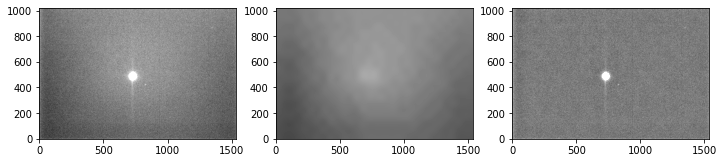

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(12,6))
lo,up = np.percentile(image,1),np.percentile(image,99)
ax[0].imshow(image,cmap='gray',clim=(lo,up),origin='lower')
ax[1].imshow(bkg.background,cmap='gray',clim=(lo,up),origin='lower')
lo,up = np.percentile(image-bkg.background,1),np.percentile(image-bkg.background,99)
ax[2].imshow(image-bkg.background,cmap='gray',clim=(lo,up),origin='lower')

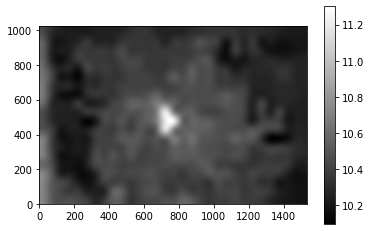

In [ ]:
plt.imshow(bkg.background_rms,cmap='gray',origin='lower')
plt.colorbar()

## Get astrometry with astrometry.net

In [ ]:
#Run a command on terminal
import os
ra,dec = '20:34:52.3', '+60:09:14'
file = 'ngc6946_2019-10-25_20-23-17_black_0327.fits'
outfile = 'ngc6946_2019-10-25_20-23-17_black_0327_astrometry.fits'
os.system("solve-field --ra "+str(ra)+" --dec "+str(dec)+
          " --radius 0.5 --dir "+dir+" --new-fits "+dir+outfile+
          " --cpulimit 1800 "+file)

TypeError: ignored

## Other tools

### Better alignment:
https://github.com/toros-astro/astroalign

### RGB color composite:
http://docs.astropy.org/en/stable/visualization/rgb.html

### To do aperture photometry:
https://photutils.readthedocs.io/en/stable/aperture.html

### To do PSF photometry:
https://photutils.readthedocs.io/en/stable/psf.html

### To do surface photometry:
https://photutils.readthedocs.io/en/stable/isophote.html

### To analyze time-series:
https://docs.astropy.org/en/stable/timeseries/

### On model fitting:
https://emcee.readthedocs.io/en/stable/tutorials/line/

## Other tools (more advanced):
### To obtain/fit stellar isochrones:
See notebook on [Isochrone fitting tutorial](https://colab.research.google.com/drive/1dcInO6RnbivCPASpa93IvZDpoeX7emT4?usp=sharing)

Python library: https://isochrones.readthedocs.io/en/latest/starmodel.html
### To model eclipsing binaries:
http://phoebe-project.org/